In [62]:
import wikireader
import nlp
import model
import graphics
import ontology


In [63]:

text_to_parse = wikireader.collect_articles(
    'Объектно-ориентированное_программирование')

#print(text_to_parse[:500])


In [64]:
sentences = nlp.parse_text_to_words(text_to_parse)

print("Количество предложений:" + str(len(sentences)))
words_amount = sum([len(sent) for sent in sentences])
print("Количество слов: " + str(words_amount))
#for sent in sentences[:5]:
#    print(sent)


Количество предложений:164
Количество слов: 4779


In [65]:

sentences_array = nlp.normalization(sentences)

print("Количество предложений:" + str(len(sentences_array)))
words_amount = sum([len(sent) for sent in sentences_array])
print("Количество слов: " + str(words_amount))
for sent in sentences_array[:5]:
    print(sent)


TypeError: extend() takes exactly one argument (2 given)

In [66]:
import nltk

sentences = nlp.add_bigrams(sentences_array, 5, 10.0)
for sent in sentences[:200]:
    # Вывод биграмм из первых 200 предложений.
    for word in sent:
        for symbol in word:
            if symbol == "_":
                print(word)


words = [word for sent in sentences for word in sent]
print("Unique words:", len(set(words)))
freq = nltk.FreqDist(words)
freq.most_common(15)

NameError: name 'sentences_array' is not defined

In [67]:

w2v_model = model.train_word2vec(sentences,
min_count=1, window=5, size=250, sample=0.001, epochs=100)

print("Trained")
print("Размер словаря: ", len(w2v_model.wv.vocab))

8.388580799102783
Trained
Размер словаря:  1827


In [68]:
ontology.populate_ontology(w2v_model,
                    input_onto = "file://C:\Dev\Python\course_project\OOPOntology.owl", 
                    output_onto = r"C:\Dev\Python\course_project\test.owl")


ЯзыкПрограммирования

ТипДанных

МодификаторДоступа
protected: 0.9573
public: 0.9176
обозначающие: 0.8220
feature: 0.8062
соответственно: 0.7360
модификаторы: 0.7050
.Одни: 0.6582
открытые: 0.6262
такие: 0.5912
Традиционно: 0.5846

ПринципООП
множественное: 0.5187
допускается: 0.5183
быстрой: 0.5098
создаёт: 0.5096
называется: 0.4992
Множественное: 0.4963
базовым: 0.4930
поддерживает: 0.4922
родительским: 0.4783
единичное: 0.4759

СсылочныйТипДанных
системах: 0.4337
исполняющих: 0.4002
представляться: 0.3881
особенностей: 0.3728
ссылочный: 0.3617
иметь: 0.3546
используется: 0.3468
типа: 0.3452
Симуле: 0.3395
Интерфейс: 0.3395



In [69]:
print(w2v_model['язык'])
w2v_model.wv.most_similar(positive="содержит",topn=5)

[ 5.20902360e-03 -3.49133406e-05  1.04045957e-01  4.83442321e-02
  6.50967062e-02  7.08302483e-02  2.54740827e-02 -3.85354497e-02
  1.22482544e-02 -8.22264850e-02  3.75219900e-03  3.05981666e-04
 -3.85317095e-02  2.18873955e-02 -5.70879243e-02 -2.53760032e-02
  6.42025992e-02  2.10931972e-02  7.78218210e-02 -5.40316850e-02
  1.93005207e-03  5.11681177e-02  1.04450248e-01  5.96597008e-02
  1.02765039e-01 -3.60725075e-02  1.33669943e-01  7.68482387e-02
  8.65093991e-02 -1.60908420e-02  6.03320152e-02  3.55625302e-02
 -8.26755911e-03  2.50153756e-03 -7.04778172e-03  6.84503913e-02
 -9.51949507e-03 -8.77133906e-02 -1.04247108e-01  2.49206387e-02
  1.61690846e-01  5.39199673e-02  3.45515199e-02  1.05435222e-01
  1.62473664e-01 -9.51498449e-02  9.54626575e-02 -1.25350624e-01
 -2.19574710e-03 -1.21266150e-03  3.71731520e-02 -5.89119121e-02
  5.03155477e-02 -2.76142322e-02 -1.38236247e-02  6.31858706e-02
 -3.05665117e-02 -7.63181448e-02 -2.47611273e-02 -8.58745277e-02
 -7.33334422e-02 -2.12279

[('объявление', 0.6504554748535156),
 ('ООЯ', 0.5384231805801392),
 ('имена', 0.5198679566383362),
 ('свойства', 0.5014374852180481),
 ('#', 0.47466903924942017)]

In [70]:
graphics.display_pca_scatterplot(w2v_model.wv,
                        ["класс", "интерфейс", "инкапсуляция", "наследование",
                         "java", "private", "protected", "public",
                         "язык", "программирование"])
                         
graphics.display_pca_scatterplot(w2v_model.wv, sample=20)

KeyError: "word 'java' not in vocabulary"

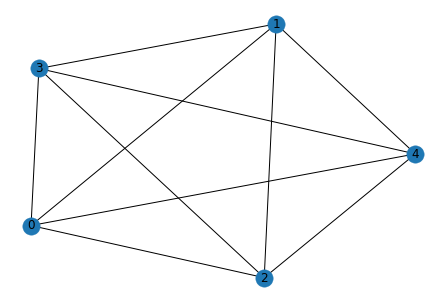

In [71]:
import matplotlib.pyplot as plt
import networkx as nx

G=nx.complete_graph(5)

nx.draw(G, with_labels=True)